In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [172]:
im = plt.imread(r'../../Downloads/puppy.jpeg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
imEdge = cv2.Canny(im, 150, 250)


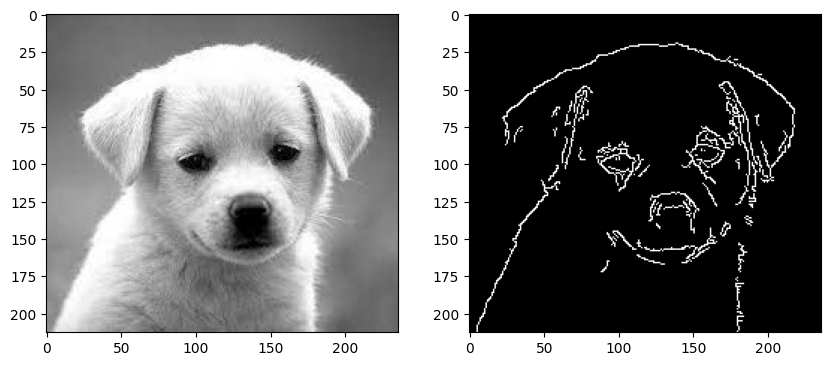

In [173]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(im, cmap='gray')
ax2.imshow(imEdge, cmap='gray')

# GAUSSIAN FILTER

In [174]:
x = 0
y = -1
sigma = 1
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.09653235263005391

In [175]:
def f_getGaussianFilter(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [176]:
G = f_getGaussianFilter(11,2)

In [177]:
G

array([[7.68103295e-05, 2.36592471e-04, 5.67555834e-04, 1.06033389e-03,
        1.54277671e-03, 1.74819504e-03, 1.54277671e-03, 1.06033389e-03,
        5.67555834e-04, 2.36592471e-04, 7.68103295e-05],
       [2.36592471e-04, 7.28756116e-04, 1.74819504e-03, 3.26605832e-03,
        4.75208682e-03, 5.38481983e-03, 4.75208682e-03, 3.26605832e-03,
        1.74819504e-03, 7.28756116e-04, 2.36592471e-04],
       [5.67555834e-04, 1.74819504e-03, 4.19370190e-03, 7.83486662e-03,
        1.13996637e-02, 1.29175112e-02, 1.13996637e-02, 7.83486662e-03,
        4.19370190e-03, 1.74819504e-03, 5.67555834e-04],
       [1.06033389e-03, 3.26605832e-03, 7.83486662e-03, 1.46374579e-02,
        2.12973755e-02, 2.41330882e-02, 2.12973755e-02, 1.46374579e-02,
        7.83486662e-03, 3.26605832e-03, 1.06033389e-03],
       [1.54277671e-03, 4.75208682e-03, 1.13996637e-02, 2.12973755e-02,
        3.09874986e-02, 3.51134361e-02, 3.09874986e-02, 2.12973755e-02,
        1.13996637e-02, 4.75208682e-03, 1.54277671e-

In [178]:
np.sum(G)

0.9891178756586588

In [179]:
cv2.getGaussianKernel?

Docstring:
getGaussianKernel(ksize, sigma[, ktype]) -> retval
.   @brief Returns Gaussian filter coefficients.
.   
.   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
.   coefficients:
.   
.   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
.   
.   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
.   
.   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
.   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
.   You may also use the higher-level GaussianBlur.
.   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
.   @param sigma Gaussian standard deviation. If it is non-positive, it is computed from ksize as
.   `sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8`.
.   @param ktype Type of filter coefficients. It can be CV_3

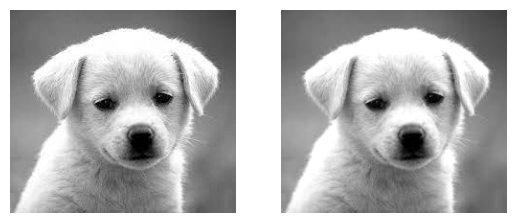

In [180]:
G = f_getGaussianFilter(3,0.5)
img_S = cv2.filter2D(im,-1,G)
plt.subplot(121)
plt.imshow(imGray,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S,cmap='gray')
plt.axis('off')
plt.show()

In [181]:
img_S = img_S[:,:,0]
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1

In [182]:
mask_x

array([[-1.],
       [ 1.]])

In [183]:
img_S = np.float64(img_S)
Ix = cv2.filter2D(img_S,-1,mask_x)
mask_y = mask_x.T
Iy = cv2.filter2D(img_S,-1,mask_y)

In [184]:
Ix.dtype

dtype('float64')

In [185]:
Iy.shape

(213, 236)

In [186]:
img_S.shape

(213, 236)

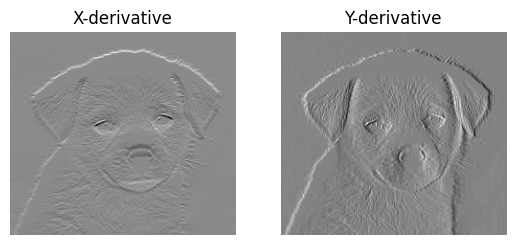

In [187]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [188]:
gv = np.array([Ix[150,130],Iy[150,130]])

In [189]:
gv

array([6., 2.])

In [190]:
Ix.dtype

dtype('float64')

In [191]:
def Gx(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gx = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX,y-minY] = v
    return Gx

In [192]:
def Gy(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gy = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX,y-minY] = v
    return Gy

In [193]:
gx = Gx(5,0.9)
gy = Gy(5,0.9)

In [194]:
gx

array([[ 0.00347709,  0.02215466,  0.04107221,  0.02215466,  0.00347709],
       [ 0.01107733,  0.07058039,  0.130848  ,  0.07058039,  0.01107733],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01107733, -0.07058039, -0.130848  , -0.07058039, -0.01107733],
       [-0.00347709, -0.02215466, -0.04107221, -0.02215466, -0.00347709]])

In [195]:
gy

array([[ 0.00347709,  0.01107733,  0.        , -0.01107733, -0.00347709],
       [ 0.02215466,  0.07058039,  0.        , -0.07058039, -0.02215466],
       [ 0.04107221,  0.130848  ,  0.        , -0.130848  , -0.04107221],
       [ 0.02215466,  0.07058039,  0.        , -0.07058039, -0.02215466],
       [ 0.00347709,  0.01107733,  0.        , -0.01107733, -0.00347709]])

In [196]:
im.shape

(213, 236, 3)

In [197]:
img = np.float64(im[:,:,0])

In [198]:
Ix = cv2.filter2D(img,-1,gx)
Iy = cv2.filter2D(img,-1,gy)

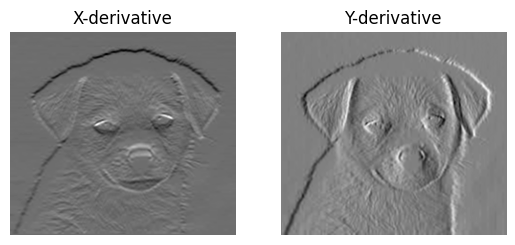

In [199]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [200]:
Gm = (Ix**2 + Iy**2)**0.5
Gd = np.rad2deg(np.arctan2(Iy,Ix))

In [201]:
Gd.min(),Gd.max()

(-180.0, 180.0)

In [202]:
Gd.shape

(213, 236)

In [203]:
Gm.min(), Gm.max()

(1.2403576122861542e-17, 77.56433209664725)

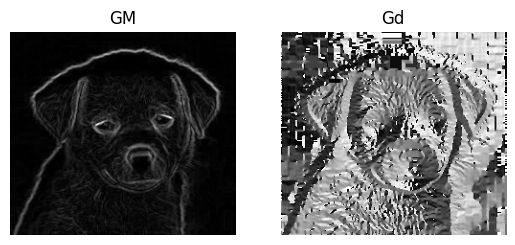

In [204]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gd,cmap='gray')
plt.title('Gd')
plt.axis('off')
plt.show()

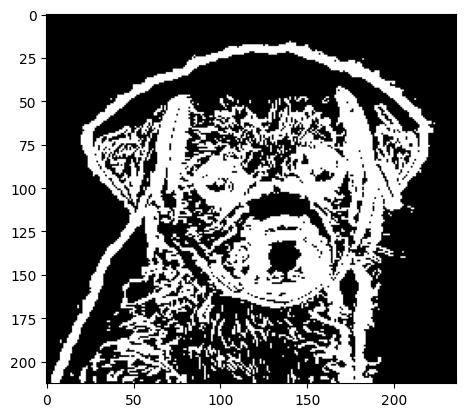

In [205]:
plt.imshow(Gm>5,cmap='gray')

(array([5667., 4936., 5553., 4246., 4050., 4124., 4887., 5746., 5442.,
        5617.]),
 array([-180., -144., -108.,  -72.,  -36.,    0.,   36.,   72.,  108.,
         144.,  180.]),
 <BarContainer object of 10 artists>)

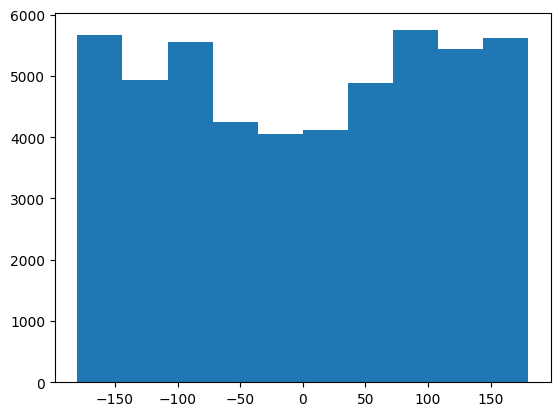

In [206]:
plt.hist(Gd.flatten())

In [207]:
bins = np.array([-180.,-135.,-90.,-45.,0.,45.,90.,135.,180.])
inds = np.digitize(Gd,bins)-1
Gd_bin = bins[inds.flatten()].reshape(Gd.shape)

In [208]:
bins

array([-180., -135.,  -90.,  -45.,    0.,   45.,   90.,  135.,  180.])

In [209]:
inds

array([[2, 2, 1, ..., 6, 0, 0],
       [8, 0, 1, ..., 7, 0, 0],
       [7, 0, 0, ..., 7, 0, 0],
       ...,
       [3, 5, 0, ..., 5, 3, 3],
       [4, 4, 1, ..., 5, 3, 3],
       [4, 2, 2, ..., 5, 3, 3]])

In [210]:
Gd_bin

array([[ -90.,  -90., -135., ...,   90., -180., -180.],
       [ 180., -180., -135., ...,  135., -180., -180.],
       [ 135., -180., -180., ...,  135., -180., -180.],
       ...,
       [ -45.,   45., -180., ...,   45.,  -45.,  -45.],
       [   0.,    0., -135., ...,   45.,  -45.,  -45.],
       [   0.,  -90.,  -90., ...,   45.,  -45.,  -45.]])

In [211]:
i,j = 50,50
Gd[i,j],Gd_bin[i,j]

(-178.28605519463193, -180.0)

In [212]:
A = np.array([180.,134.,179.,135,-33.,-180.])
inds = np.digitize(A,bins)-1

In [213]:
inds

array([8, 6, 7, 7, 3, 0])

In [214]:
inds.dtype

dtype('int64')

In [215]:
bins[inds]

array([ 180.,   90.,  135.,  135.,  -45., -180.])

In [216]:
A = np.array([180.,134.,179.,135,-33.,-180.,12,-12,-170])
A_bin = 45*(np.round(A/45))

In [217]:
A_bin

array([ 180.,  135.,  180.,  135.,  -45., -180.,    0.,   -0., -180.])

In [218]:
Gd_bin = 45*(np.round(Gd/45))
Gd_bin

array([[ -45.,  -90.,  -90., ...,   90., -180., -180.],
       [ 180., -135., -135., ...,  180., -180., -180.],
       [ 180., -135., -135., ...,  135., -180., -180.],
       ...,
       [  -0.,   90., -135., ...,   90.,   -0.,   -0.],
       [   0.,    0., -135., ...,   90.,   -0.,   -0.],
       [   0.,  -90.,  -90., ...,   90.,   -0.,   -0.]])

In [219]:
i,j = 100,100
Gd[i,j],Gd_bin[i,j]

(11.754133140661992, 0.0)

In [220]:
def NMS(Gm,Gd):
    Gd_bin = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows,numCols = Gm.shape[0],Gm.shape[1]
    a,b=0.,0.
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                a,b = Gm[r-1,c], Gm[r+1,c]
            elif ang == 45. or ang == -135.:
                a,b = Gm[r+1,c+1],Gm[r-1,c-1]
            elif ang == 90. or ang == -90.:
                a,b = Gm[r,c-1],Gm[r,c+1]
            elif ang == 135. or ang == -45.:
                a,b = Gm[r-1,c+1],Gm[r+1,c-1]
            else:
                print('Error')
                return
            if Gm[r,c] >= a and Gm[r,c] >= b:
                Gm_NMS[r,c] = Gm[r,c]
    return Gm_NMS

In [221]:
Gm_NMS = NMS(Gm, Gd)

Gm_NMS

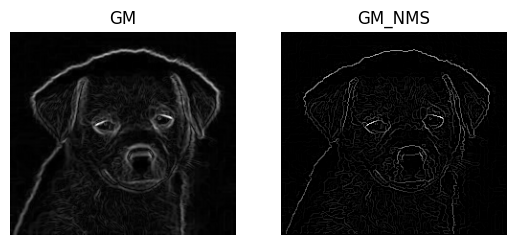

In [222]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gm_NMS,cmap='gray')
plt.title('GM_NMS')
plt.axis('off')
plt.show()

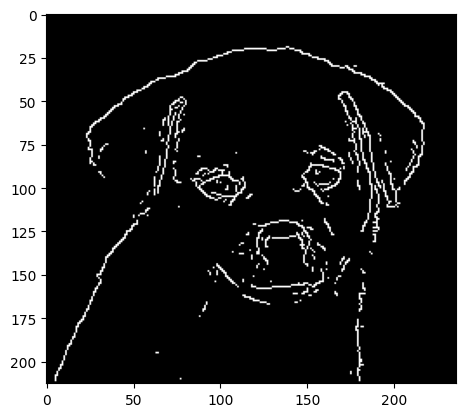

In [226]:
plt.imshow(Gm_NMS>15,cmap='gray')

In [227]:
from skimage import filters
L = Gm_NMS.mean()
H = L + Gm_NMS.std()
E = filters.apply_hysteresis_threshold(Gm_NMS,L,H)

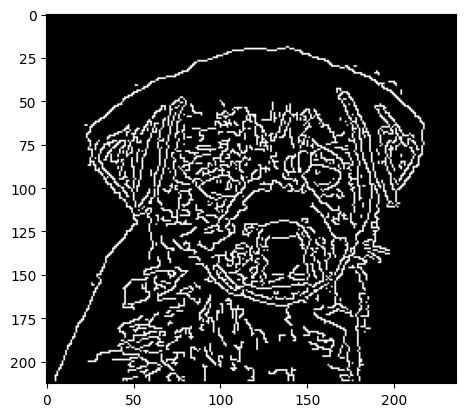

In [228]:
plt.imshow(E,cmap='gray')